In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import uproot
import sys

dir = "/Users/alexanderantonakis/Desktop/Software/AFrameAnalysis/Scripts/"

sys.path.append("../Utils")
sys.path.append("../Configs")

from ChannelMap import ChannelMap

frame = 7
strip_w = 11.2 # cm
cluster_file = "clusters_frame7.root"
config = "config_frame7.txt"
run_config = "run_config_frame7.txt"

# set up the geometry of the frame
map = ChannelMap("../Configs/"+config, "../Configs/"+run_config)
map.initialize_config()
map.initialize_run_config()
map.calculate_params()
print("initialized the geometry and voltages")
print("")

# initialize the horizontal febs --> useful to have
febs = map.mac5
horiz_febs = []
for feb in febs:
    if map.is_horiz(feb):
        horiz_febs.append(feb)
        
print("All Horizontal FEBs in this file:", horiz_febs)


# Open the ROOT file and the TTree
file = uproot.open(cluster_file)  # Replace with your ROOT file
tree = file["cluster_tree"]    

# Convert the TTree to a pandas DataFrame
df = tree.arrays(library="pd")

df[:2]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Welcome to JupyROOT 6.28/04
['72', '75', '199', '198', '197', '200', '202', '203', '76', '71', '']
['113.2', '120.5', '0', '0', '0', '0', '0', '0', '115', '116.8', '']
['4', '-9.1', '-9.25', '-8.1', '-4', '3.85', '8.35', '8.4', '8.35', '']
['29.2', '-16.55', '-15.3', '-8.3', '-4.4', '4.3', '8.6', '15.35', '16.55', '']
['2', '2', '0', '0', '0', '1', '1', '1', '2', '2', '']
['1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '']
['4243', '4244', '4245', '4246', '']
['215', '200', '185', '170', '140

,strips,times,adcA,adcB
0,[4243 5 5 -1 6 6 6],[4243 2573181 2573177 -1 2573163 2573164 2573162],[4243 2985 1620 -1 3667 2483 2307],[4243 1120 1243 -1 2982 1640 4030]
1,[4243 8 8 8 6 6 6],[4243 5248053 5248055 5248101 5248048 5248047 ...,[4243 2996 1880 1485 416 1876 1421],[4243 3735 1426 486 2378 2799 2206]


In [2]:
strip_df = pd.DataFrame(df['strips'].tolist())
columns = ["Run"]
for feb in horiz_febs:
    columns.append("FEB"+str(feb))
strip_df.columns = columns

print("made the strip dataframe")
strip_df[:5]

made the strip dataframe


,Run,FEB199,FEB198,FEB197,FEB200,FEB202,FEB203
0,4243,5,5,-1,6,6,6
1,4243,8,8,8,6,6,6
2,4243,-1,-1,0,0,0,-1
3,4243,6,5,5,2,2,2
4,4243,10,10,10,11,11,11


In [3]:
time_df = pd.DataFrame(df['times'].tolist())

time_df.columns = columns

print("made the time dataframe")
time_df[:5]

made the time dataframe


,Run,FEB199,FEB198,FEB197,FEB200,FEB202,FEB203
0,4243,2573181,2573177,-1,2573163,2573164,2573162
1,4243,5248053,5248055,5248101,5248048,5248047,5248046
2,4243,-1,-1,16492375,16492379,16492380,-1
3,4243,23358498,23358499,23358500,23358512,23358510,23358506
4,4243,36002599,36002595,36002593,36002598,36002593,36002598


In [4]:
adcA_df = pd.DataFrame(df['adcA'].tolist())

adcA_df.columns = columns

print("made the adcA dataframe")
adcA_df[:5]

made the adcA dataframe


,Run,FEB199,FEB198,FEB197,FEB200,FEB202,FEB203
0,4243,2985,1620,-1,3667,2483,2307
1,4243,2996,1880,1485,416,1876,1421
2,4243,-1,-1,2258,4089,621,-1
3,4243,4089,2522,4089,1036,1153,3632
4,4243,1192,720,772,1144,822,853


In [5]:
adcB_df = pd.DataFrame(df['adcB'].tolist())

adcB_df.columns = columns

print("made the adcB dataframe")
adcB_df[:5]

made the adcB dataframe


,Run,FEB199,FEB198,FEB197,FEB200,FEB202,FEB203
0,4243,1120,1243,-1,2982,1640,4030
1,4243,3735,1426,486,2378,2799,2206
2,4243,-1,-1,2065,1755,1888,-1
3,4243,4089,3852,1804,3337,2734,2399
4,4243,1896,630,1819,3208,1839,4089


In [6]:
runs = list(set(list(strip_df['Run'].values)))
print("runs", runs)

runs [4243, 4244, 4245, 4246]


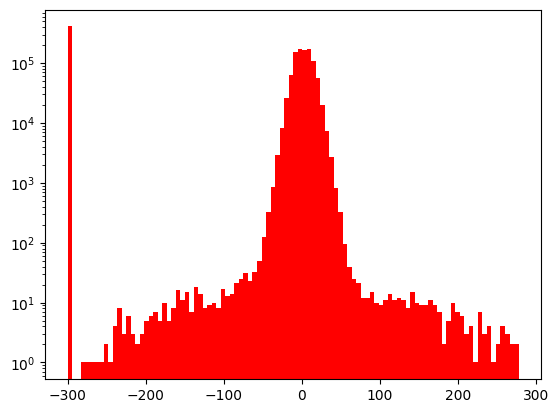

In [9]:
def deltaT(row):
    diff = -300
    if row["FEB"+str(horiz_febs[0])] > -1 and row["FEB"+str(horiz_febs[-1])] > -1:
        diff = row["FEB"+str(horiz_febs[0])] - row["FEB"+str(horiz_febs[-1])]     
    return diff

time_df["deltT"] = time_df.apply(deltaT, axis=1)

plt.hist(time_df["deltT"].values, bins=100, color="r")
plt.yscale("log")
plt.show()

In [ ]:
def calculate_z(row):